In [8]:
import cdsapi
c = cdsapi.Client()

dataset = 'reanalysis-era5-pressure-levels'
request = {
    'product_type': 'reanalysis',
    'variable': 'geopotential',
    'year': '2024',
    'month': '03',
    'day': '01',
    'time': '13:00',
    'pressure_level': '1000',
    'format': 'netcdf',
}
target = 'download.nc'
c.retrieve(dataset, request, target)


2025-10-21 19:37:33,779 INFO Request ID is 905abb7f-359a-4944-82c6-6d7136572aed
2025-10-21 19:37:33,925 INFO status has been updated to accepted
2025-10-21 19:37:47,978 INFO status has been updated to running
2025-10-21 19:37:55,723 INFO status has been updated to successful


abcaaf9e1681fe171a159eeb32dac2dd.nc:   0%|          | 0.00/1.52M [00:00<?, ?B/s]

'download.nc'

In [9]:
import xarray as xr

ds = xr.open_dataset("download.nc", engine="netcdf4")
print(ds)

<xarray.Dataset> Size: 4MB
Dimensions:         (valid_time: 1, pressure_level: 1, latitude: 721,
                     longitude: 1440)
Coordinates:
    number          int64 8B ...
  * valid_time      (valid_time) datetime64[ns] 8B 2024-03-01T13:00:00
  * pressure_level  (pressure_level) float64 8B 1e+03
  * latitude        (latitude) float64 6kB 90.0 89.75 89.5 ... -89.75 -90.0
  * longitude       (longitude) float64 12kB 0.0 0.25 0.5 ... 359.2 359.5 359.8
    expver          <U4 16B ...
Data variables:
    z               (valid_time, pressure_level, latitude, longitude) float32 4MB ...
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2025-10-21T23:37 GRIB to CDM+CF via cfgrib-0.9.1...


In [11]:
print(ds['z'])


<xarray.DataArray 'z' (valid_time: 1, pressure_level: 1, latitude: 721,
                       longitude: 1440)> Size: 4MB
[1038240 values with dtype=float32]
Coordinates:
    number          int64 8B ...
  * valid_time      (valid_time) datetime64[ns] 8B 2024-03-01T13:00:00
  * pressure_level  (pressure_level) float64 8B 1e+03
  * latitude        (latitude) float64 6kB 90.0 89.75 89.5 ... -89.75 -90.0
  * longitude       (longitude) float64 12kB 0.0 0.25 0.5 ... 359.2 359.5 359.8
    expver          <U4 16B ...
Attributes: (12/31)
    GRIB_paramId:                             129
    GRIB_dataType:                            an
    GRIB_numberOfPoints:                      1038240
    GRIB_typeOfLevel:                         isobaricInhPa
    GRIB_stepUnits:                           1
    GRIB_stepType:                            instant
    ...                                       ...
    GRIB_shortName:                           z
    GRIB_totalNumber:                         0
 

In [16]:
df = ds['z'].to_dataframe().reset_index()


In [18]:
print(df.head())

           valid_time  pressure_level  latitude  longitude  number expver  \
0 2024-03-01 13:00:00          1000.0      90.0       0.00       0   0001   
1 2024-03-01 13:00:00          1000.0      90.0       0.25       0   0001   
2 2024-03-01 13:00:00          1000.0      90.0       0.50       0   0001   
3 2024-03-01 13:00:00          1000.0      90.0       0.75       0   0001   
4 2024-03-01 13:00:00          1000.0      90.0       1.00       0   0001   

             z  
0  1986.394531  
1  1986.394531  
2  1986.394531  
3  1986.394531  
4  1986.394531  


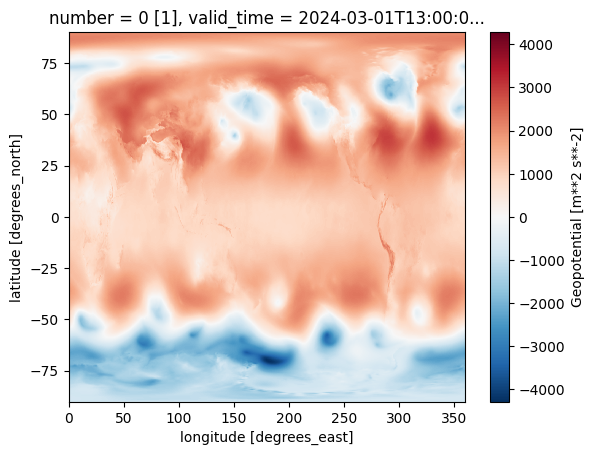

In [12]:
import matplotlib.pyplot as plt
ds['z'].isel(valid_time=0, pressure_level=0).plot()
plt.show()


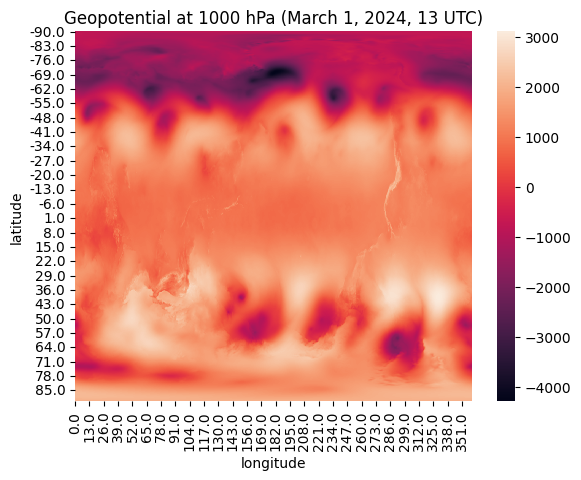

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

zgrid = df.pivot(index='latitude', columns='longitude', values='z')
sns.heatmap(zgrid)
plt.title("Geopotential at 1000 hPa (March 1, 2024, 13 UTC)")
plt.show()
